<br>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Sentiment Analysis of Amazon Fine Food Reviews</h2> 
<br>

<a id="2"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> Data collection</h2>

### Amazon Fine Food Reviews
#### Source : https://www.kaggle.com/snap/amazon-fine-food-reviews


<h2 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Table of Contents</h2>

   #### [1. Data Preparocessing](#1)
   #### [2. Explory Data Analysis](#2)
   #### [3. Model Training](#3)
   #### [4. Vectorization](#4)
   #### [5. Model Evaluation](#5)
   #### [6. Deployment](#6)

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
from wordcloud import STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

<a id="1"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">1. Data Preparation</h2>

In [2]:
df = pd.read_csv('../data/Reviews.csv')

In [3]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
df.sample(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
250174,250175,B002XAIEUI,A2KHUQBX39VZC3,"Walter Jeffries ""Walter""",0,2,1,1264204800,Ugh,Neither my wife nor I like this one. We love A...
184090,184091,B00764BRS2,AV4FV1BA7R4VC,MiMi,1,1,5,1290556800,love love love it!,I am so happy with this product i dont know wh...


In [5]:
df.shape

(568454, 10)

In [6]:
# Check null values
df.isna().sum().to_frame(name='missing values')

,missing values
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


Drop null values

In [7]:
total_rows = df.shape[0]
df.dropna(how='any',inplace=True)
remaining_rows = df.shape[0]

removed_rows = total_rows-remaining_rows
print('No. of rows removed :', removed_rows)

No. of rows removed : 53


In [8]:
print(f"\nPercentage of data removed:{np.round((removed_rows/total_rows)*100,2)}%")
print(f"Percentage of data reamining:{np.round((remaining_rows/total_rows)*100,2)}")


Percentage of data removed:0.01%
Percentage of data reamining:99.99


Remove duplicate rows

In [9]:
a =  df.shape[0]
df.drop_duplicates(inplace=True, subset=['Score','Text'])
b = df.shape[0]

print("No. of rows removed :", a-b)

print(f"\nPercentage of data removed: {np.round(((a-b)/total_rows)*100,2)}%")
print(f"Percentage of data remaining: {np.round((b/total_rows)*100,2)}%")

No. of rows removed : 174745

Percentage of data removed: 30.74%
Percentage of data remaining: 69.25%


Remove outliers

In [10]:
a =  df.shape[0]

idx = df[df["HelpfulnessNumerator"]>df["HelpfulnessDenominator"]].index
df.drop(index=idx, inplace=True)

b = df.shape[0]

print("No. of rows removed :", a-b)

print(f"\nPercentage of data removed:{np.round(((a-b)/total_rows)*100,2)}%")
print(f"Percentage of data remaining:{np.round((b/total_rows)*100,2)}%")

No. of rows removed : 2

Percentage of data removed:0.0%
Percentage of data remaining:69.25%


Create target column using Score

In [11]:
## `Score` > 3 : "Positive" 
## `Score` == 3 : "Neutral"
## `Score` < 3 : "Negative"

def create_target(x):
    return "Positive" if x>3 else "Negative" if x<3 else "Neutral"

df.loc[:, 'target'] = df.Score.apply(create_target)

In [12]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,target
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative


In [13]:
df[['Score','target']].sample(15)

,Score,target
155491,5,Positive
126715,5,Positive
527976,4,Positive
126422,1,Negative
102706,4,Positive
95777,5,Positive
446358,5,Positive
85058,4,Positive
22338,5,Positive
185907,5,Positive


<a id="1"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">2. Explory Data Analysis</h2>

In [14]:
df.head(1)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,target
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive


In [15]:
df = df.drop(columns=['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time','Summary'])

In [16]:
df.head(2)

,Text,target
0,I have bought several of the Vitality canned d...,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,Negative


In [17]:
df['target'].value_counts()

target
Positive    306805
Negative     57079
Neutral      29770
Name: count, dtype: int64

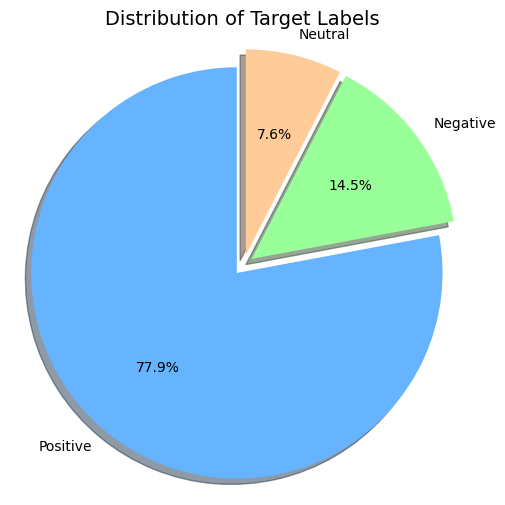

In [18]:
# Generate the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(
    df['target'].value_counts(),  # Values to plot
    labels=['Positive', 'Negative', 'Neutral'],  # Labels for each slice
    colors=['#66b3ff', '#99ff99', '#ffcc99'],  # Custom colors for each slice
    autopct='%1.1f%%',  # Display percentages with one decimal place
    startangle=90,  # Start the pie chart from a 90-degree angle
    shadow=True,  # Add a shadow for a 3D effect
    explode=(0.05, 0.05, 0.05)  # Slightly separate each slice for emphasis
)

plt.title('Distribution of Target Labels', fontsize=14)  # Add a title
plt.axis('equal')  # Equal aspect ratio to ensure the pie chart is circular
plt.show()

Down sampling (remove some positive and negative reviews)

In [19]:
neutral = df.loc[df.target=="Neutral"] # 29770 reviews

positive = df.loc[df.target=="Positive"].sample(50000)

negative = df.loc[df.target=="Negative"].sample(50000)

In [20]:
df = pd.concat([positive, negative, neutral])

In [21]:
df.shape

(129770, 2)

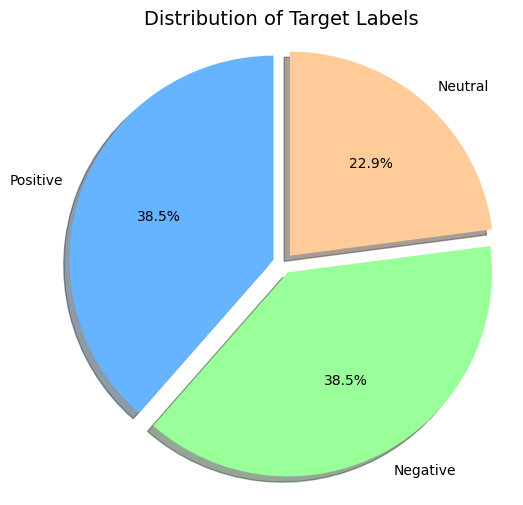

In [22]:
# Generate the pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(
    df['target'].value_counts(),  # Values to plot
    labels=['Positive', 'Negative', 'Neutral'],  # Labels for each slice
    colors=['#66b3ff', '#99ff99', '#ffcc99'],  # Custom colors for each slice
    autopct='%1.1f%%',  # Display percentages with one decimal place
    startangle=90,  # Start the pie chart from a 90-degree angle
    shadow=True,  # Add a shadow for a 3D effect
    explode=(0.05, 0.05, 0.05)  # Slightly separate each slice for emphasis
)

plt.title('Distribution of Target Labels', fontsize=14)  # Add a title
plt.axis('equal')  # Equal aspect ratio to ensure the pie chart is circular
plt.show()

In [23]:
df['num_characters'] = df['Text'].apply(len)

In [24]:
df['num_characters']

196094    584
395920    433
122040    585
180766    107
82545     131
         ... 
568336    137
568355    227
568369    663
568379    259
568422    391
Name: num_characters, Length: 129770, dtype: int64

In [25]:
# num of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df['num_words']

196094    124
395920     93
122040    122
180766     25
82545      28
         ... 
568336     30
568355     50
568369    138
568379     56
568422     88
Name: num_words, Length: 129770, dtype: int64

In [27]:
df.head(3)

,Text,target,num_characters,num_words
196094,These have been the best salmon eggs that I ha...,Positive,584,124
395920,"At about 6 months pregnant, I bought a bunch o...",Positive,433,93
122040,I AM CURRENTLY TRYING TO LOOSE SOME WEIGHT SO ...,Positive,585,122


In [28]:
df.shape

(129770, 4)

In [29]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df['num_sentences']

196094     8
395920     5
122040     6
180766     2
82545      3
          ..
568336     3
568355     4
568369    11
568379     3
568422     5
Name: num_sentences, Length: 129770, dtype: int64

In [31]:
df.head(2)

,Text,target,num_characters,num_words,num_sentences
196094,These have been the best salmon eggs that I ha...,Positive,584,124,8
395920,"At about 6 months pregnant, I bought a bunch o...",Positive,433,93,5


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,129770.000000,129770.000000,129770.000000
mean,460.355313,101.542976,5.130808
std,452.296565,100.886378,3.902120
min,12.000000,3.000000,1.000000
25%,193.000000,42.000000,3.000000
50%,327.000000,71.000000,4.000000
75%,564.000000,124.000000,6.000000
max,21409.000000,4145.000000,346.000000


In [33]:
df['target'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [34]:
# Positive
df[df['target'] == 'Positive'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,50000.000000,50000.000000,50000.000000
mean,416.708060,91.932060,4.852240
std,425.537049,95.320651,3.587008
min,41.000000,10.000000,1.000000
25%,175.000000,38.000000,3.000000
50%,289.000000,63.000000,4.000000
75%,503.000000,111.000000,6.000000
max,16952.000000,3818.000000,104.000000


In [35]:
# Negative
df[df['target'] == 'Negative'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,50000.000000,50000.000000,50000.000000
mean,465.797180,102.288120,5.281440
std,442.355612,98.218749,4.113365
min,12.000000,3.000000,1.000000
25%,204.000000,45.000000,3.000000
50%,342.000000,74.000000,4.000000
75%,568.000000,124.000000,7.000000
max,11861.000000,2808.000000,346.000000


In [36]:
# Neutral
df[df['target'] == 'Neutral'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,29770.000000,29770.000000,29770.000000
mean,524.522909,116.433423,5.345684
std,501.607437,111.924806,4.016550
min,32.000000,8.000000,1.000000
25%,217.000000,48.000000,3.000000
50%,376.000000,83.000000,4.000000
75%,659.000000,146.000000,7.000000
max,21409.000000,4145.000000,104.000000


<Axes: xlabel='num_characters', ylabel='Count'>

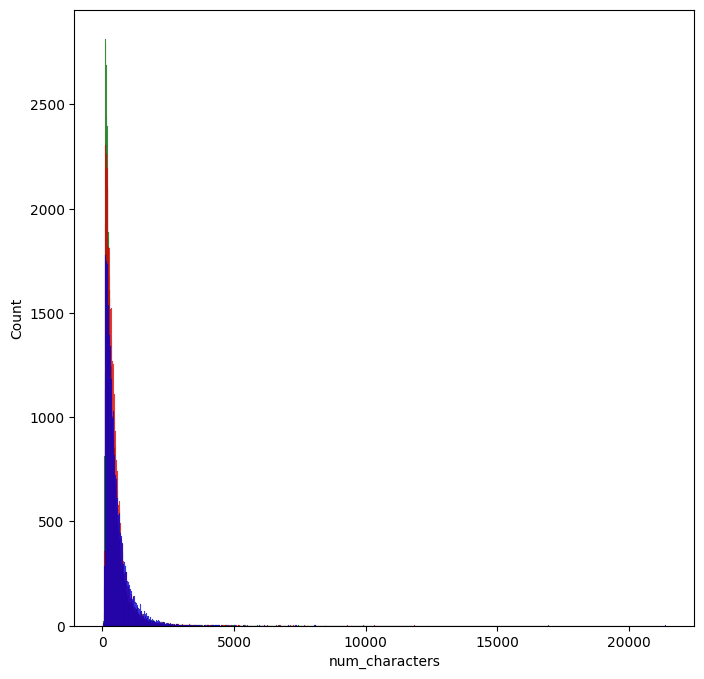

In [37]:
plt.figure(figsize=(8,8))
sns.histplot(df[df['target'] == 'Positive']['num_characters'],color='green')
sns.histplot(df[df['target'] == 'Negative']['num_characters'],color='red')
sns.histplot(df[df['target'] == 'Neutral']['num_characters'],color='blue')

<Axes: xlabel='num_words', ylabel='Count'>

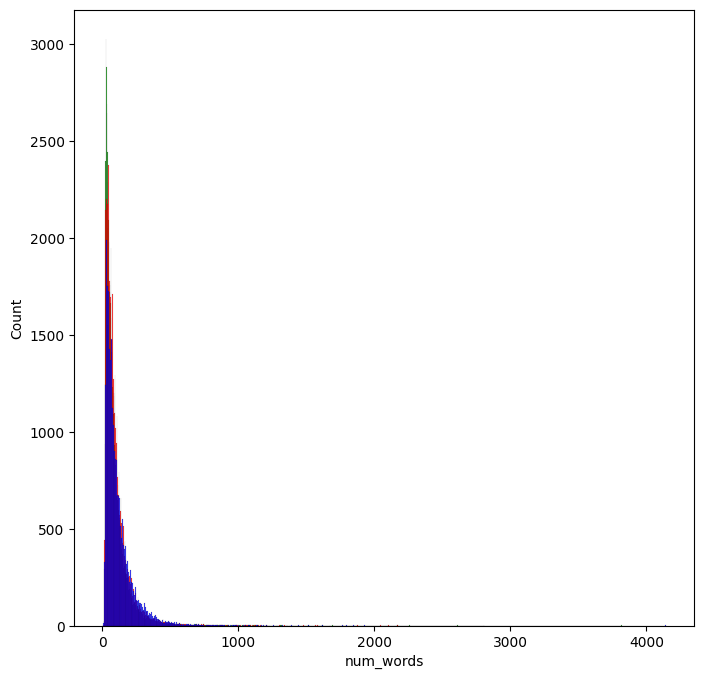

In [38]:
plt.figure(figsize=(8,8))
sns.histplot(df[df['target'] == 'Positive']['num_words'],color='green')
sns.histplot(df[df['target'] == 'Negative']['num_words'],color='red')
sns.histplot(df[df['target'] == 'Neutral']['num_words'],color='blue')

<Axes: xlabel='num_sentences', ylabel='Count'>

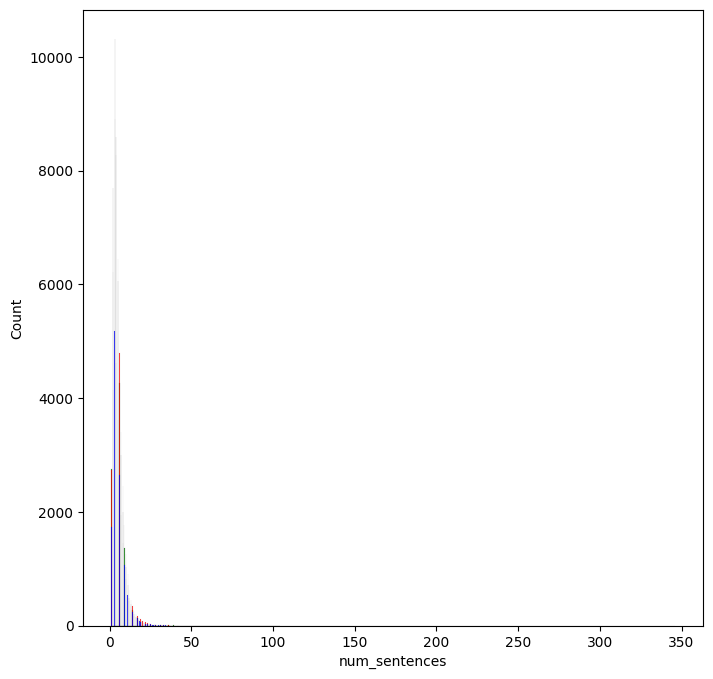

In [39]:
plt.figure(figsize=(8,8))
sns.histplot(df[df['target'] == 'Positive']['num_sentences'],color='green')
sns.histplot(df[df['target'] == 'Negative']['num_sentences'],color='red')
sns.histplot(df[df['target'] == 'Neutral']['num_sentences'],color='blue')

In [40]:
# sns.pairplot(df,hue='target')

In [41]:
df['target'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

Word cloud for Positive reviews

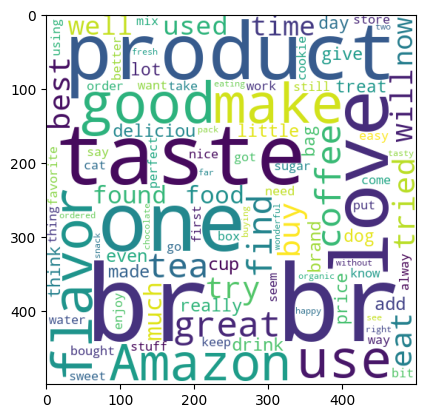

In [42]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

positive = wc.generate(df[df['target'] == 'Positive']['Text'].str.cat(sep=' '))

plt.imshow(positive)

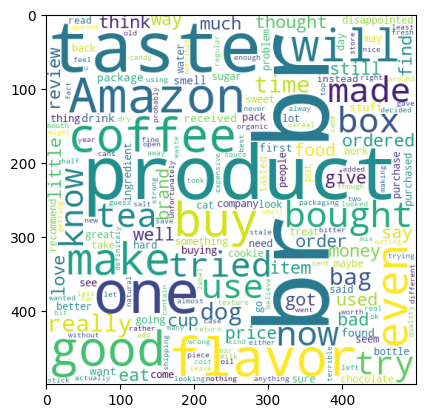

In [43]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

Negative = wc.generate(df[df['target'] == 'Negative']['Text'].str.cat(sep=' '))

plt.imshow(Negative)

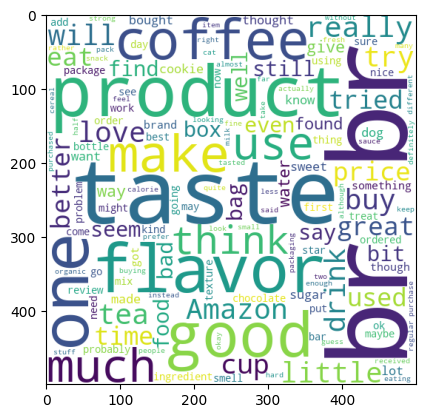

In [44]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

Neutral = wc.generate(df[df['target'] == 'Neutral']['Text'].str.cat(sep=' '))

plt.imshow(Neutral)

In [45]:
# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

final_stopwords.add("one")
print(final_stopwords)

{'them', 'shan', 'that', "that'll", 'only', 'own', 'yourself', 'him', 'wouldn', 'who', 'doesn', 'he', 'after', 'it', 'his', 'do', 'under', 'your', 'having', 'such', 'i', 'mightn', 'between', 'my', 've', 'did', 'so', 'been', 'ourselves', "you'd", 'at', 'again', 'being', 'they', 'but', 'during', 'because', 'of', 'ours', 'to', 'me', 'hasn', 'out', 'before', 'are', 'don', 'couldn', 'she', 'other', 'needn', 'for', 'won', 'their', 'over', 'one', 'there', 'whom', "you're", 'can', 'as', 'how', 'above', 'her', 'yourselves', "you've", 'is', 'yours', 'have', 'few', 'these', 'more', 's', 'what', 'this', 'haven', 'wasn', 'off', 'why', 'our', 'theirs', 'be', 'once', 'while', 'into', 'each', 'very', 'all', 'does', 'we', 'hadn', 'will', 'or', 'm', 'shouldn', 'itself', 'with', 'until', 'if', 'about', 'mustn', 'has', 'those', 'you', 'than', 'am', 'a', 'too', 'aren', "she's", 'o', 'the', 'down', 'its', 'when', 'had', 'y', 'isn', 'most', "should've", 'hers', 're', 'where', "you'll", 'then', 'myself', 'wer

Remove unwanted words from reviews

Ex. html tags, punctuation, stop words, etc..

In [46]:
stemmer = PorterStemmer()

In [47]:
HTMLTAGS = re.compile('<.*?>')

table = str.maketrans(dict.fromkeys(string.punctuation))

remove_digits = str.maketrans('','',string.digits)

MULTIPLE_WHITESPACE = re.compile(r'\s+')

In [48]:
def preprocessor(review):
    # remove html tags
    review = HTMLTAGS.sub(r'', review)

    # remove puncutuation
    review = review.translate(table)
    
    # remove digits
    review = review.translate(remove_digits)
    
    # lower case all letters
    review = review.lower()
    
    # replace multiple white spaces with single space
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()
    
    # remove stop words
    review = [word for word in review.split()if word not in final_stopwords]
    
    # stemming
    review = ' '.join([stemmer.stem(word) for word in review])
    
    return review

In [49]:
df['Text']

196094    These have been the best salmon eggs that I ha...
395920    At about 6 months pregnant, I bought a bunch o...
122040    I AM CURRENTLY TRYING TO LOOSE SOME WEIGHT SO ...
180766    Title says it all. This is not a "dark" roast ...
82545     The first time I ordered coffee, it was fresh ...
                                ...                        
568336    These taste basically as if there is no lemon ...
568355    I  paid well over labeled price and the produc...
568369    An admitted fan of Stash Earl Grey, neverthele...
568379    I hadn't tried this taco seasoning prior to pu...
568422    This version of Pacific Chai is pretty mild.  ...
Name: Text, Length: 129770, dtype: object

Word cloud

In [50]:
def generate_wcloud(text):
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(text)
    
    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

Word cloud for Positive reviews

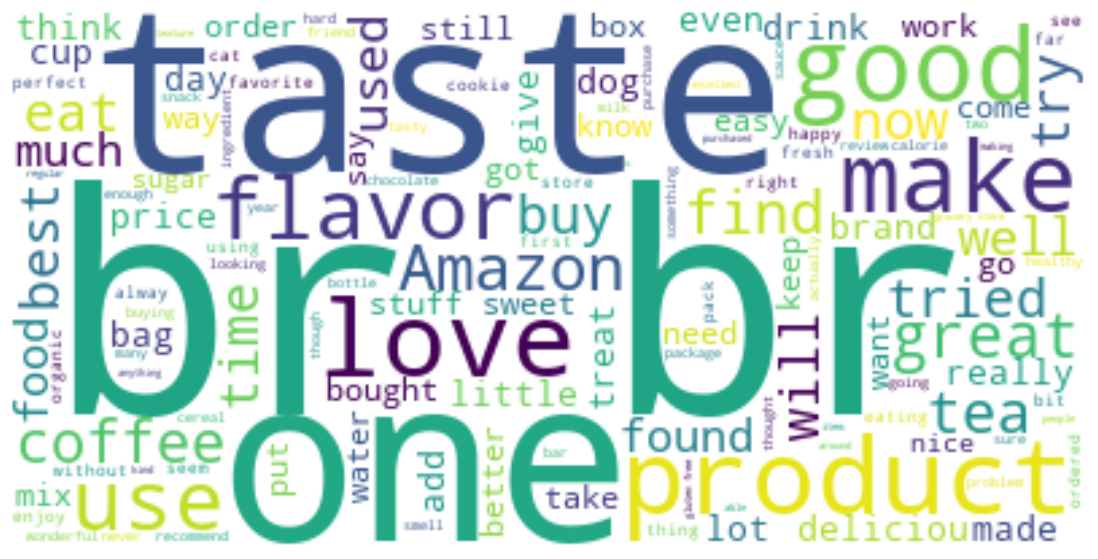

In [51]:
pos = df.loc[df.target=="Positive"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

Word cloud for Negative reviews

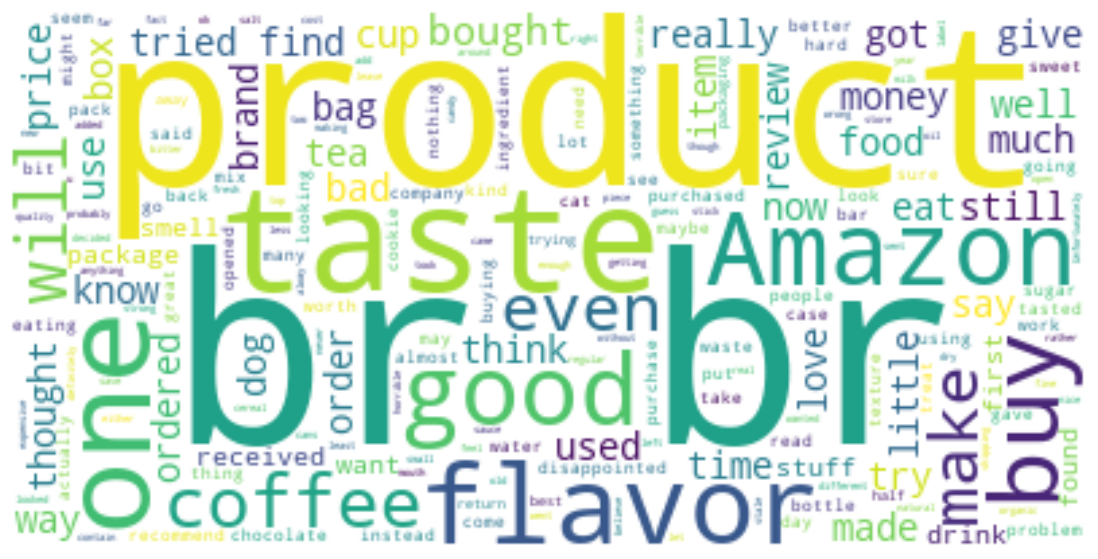

In [52]:
pos = df.loc[df.target=="Negative"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

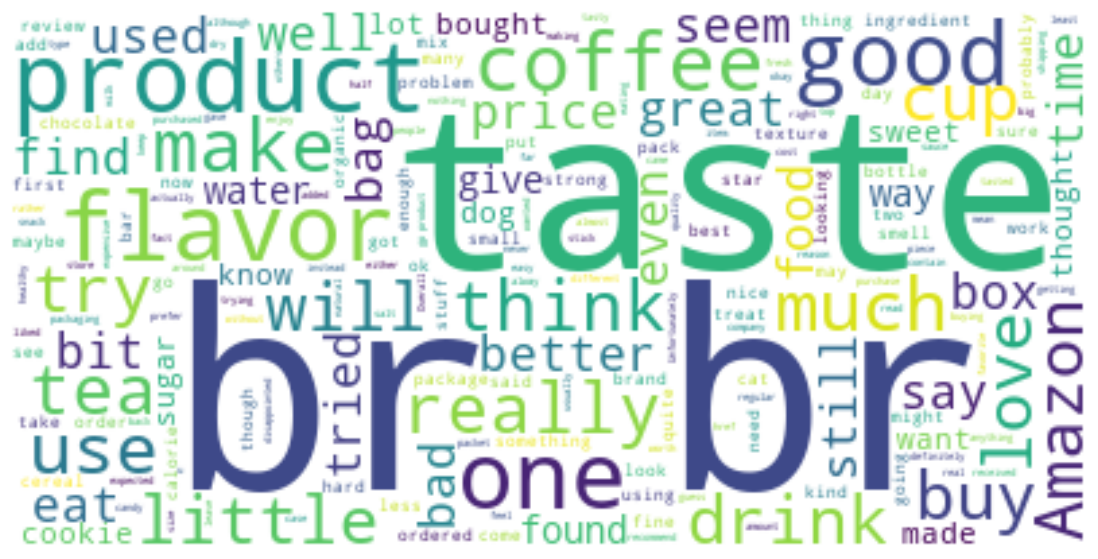

In [53]:
pos = df.loc[df.target=="Neutral"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

Most common word

In [54]:
spam_corpus = []
for msg in df[df['target'] == 'Positive']['Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
spam_corpus

['These',
 'have',
 'been',
 'the',
 'best',
 'salmon',
 'eggs',
 'that',
 'I',
 'have',
 'had',
 'outside',
 'a',
 'sushi',
 'restaurant.',
 'They',
 'are',
 'very',
 'fresh,',
 'and',
 'the',
 'eggs',
 'are',
 'whole,',
 'not',
 'crushed',
 'or',
 'broken',
 'in',
 'any',
 'way.',
 'They',
 'arrived',
 'frozen',
 'solid,',
 'packaged',
 'well.',
 'My',
 'only',
 'complaint',
 'is',
 'that',
 '2.2',
 'lbs',
 'is',
 'too',
 'much',
 'to',
 'freeze',
 'as',
 'one',
 'block.',
 'As',
 'you',
 "don't",
 'want',
 'to',
 'defrost',
 'the',
 'entire',
 'block',
 'to',
 'extract',
 'those',
 'you',
 'want',
 'to',
 'use,',
 'my',
 'solution',
 'was',
 'to',
 'use',
 'a',
 'heavy',
 'knife',
 'to',
 'knock',
 'off',
 'a',
 'section.',
 'This',
 'works',
 'pretty',
 'well',
 'but',
 'it',
 'does',
 'damage',
 'the',
 'eggs',
 'where',
 'the',
 'knife',
 'is',
 'inserted.',
 'Creative',
 'packing',
 'could',
 'have',
 'solved',
 'this',
 'problem.',
 'Even',
 'so,',
 'this',
 'is',
 'a',
 'quali

In [56]:
len(spam_corpus)

3835221

In [57]:
from collections import Counter

Counter(spam_corpus)

Counter({'the': 132198,
         'I': 115421,
         'and': 107545,
         'a': 100480,
         'to': 84154,
         'of': 65146,
         'is': 62348,
         'it': 54357,
         'for': 45624,
         'in': 45176,
         'this': 41322,
         'that': 31944,
         'my': 31081,
         'with': 29694,
         'have': 28690,
         'are': 26542,
         'but': 25360,
         'you': 24792,
         'was': 23170,
         'on': 22116,
         'as': 21712,
         '/><br': 20866,
         'not': 20766,
         'like': 18424,
         'so': 17624,
         'The': 16104,
         'they': 15759,
         'or': 14927,
         'at': 14436,
         'be': 14118,
         'This': 12964,
         'them': 12883,
         'these': 12854,
         'very': 12614,
         'just': 12551,
         'good': 12374,
         'It': 12354,
         'from': 11815,
         'can': 11442,
         'one': 11319,
         'has': 11010,
         'great': 10690,
         'than': 9861,
      

In [58]:
Counter(spam_corpus).most_common(30)

[('the', 132198),
 ('I', 115421),
 ('and', 107545),
 ('a', 100480),
 ('to', 84154),
 ('of', 65146),
 ('is', 62348),
 ('it', 54357),
 ('for', 45624),
 ('in', 45176),
 ('this', 41322),
 ('that', 31944),
 ('my', 31081),
 ('with', 29694),
 ('have', 28690),
 ('are', 26542),
 ('but', 25360),
 ('you', 24792),
 ('was', 23170),
 ('on', 22116),
 ('as', 21712),
 ('/><br', 20866),
 ('not', 20766),
 ('like', 18424),
 ('so', 17624),
 ('The', 16104),
 ('they', 15759),
 ('or', 14927),
 ('at', 14436),
 ('be', 14118)]

In [59]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,the,132198
1,I,115421
2,and,107545
3,a,100480
4,to,84154
5,of,65146
6,is,62348
7,it,54357
8,for,45624
9,in,45176


In [60]:
spam_corpus = []
for msg in df[df['target'] == 'Negative']['Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [61]:
spam_corpus

['WARNING',
 '!!!!!',
 'they',
 "don't",
 'even',
 'make',
 'there',
 'own',
 'food',
 'it',
 'is',
 'licensed',
 'out',
 'to',
 'another',
 'company',
 'if',
 'you',
 'look',
 'on',
 'the',
 'back',
 'of',
 'the',
 'bag',
 'it',
 "doesn't",
 'even',
 'list',
 'who',
 'it',
 'is',
 'made',
 'by',
 'it',
 'only',
 'says',
 'guaranteed',
 'by',
 'canidae',
 'and',
 'when',
 'i',
 'asked',
 'who',
 'it',
 'was',
 'made',
 'by',
 'i',
 'was<br',
 '/><br',
 '/>1',
 'either',
 'completely',
 'ignored<br',
 '/><br',
 '/>2',
 'given',
 'a',
 'huge',
 'run',
 'around',
 'only',
 'thing',
 'i',
 'ever',
 'got',
 'was',
 'a',
 'state',
 'it',
 'was',
 'made',
 'in',
 'they',
 "wouldn't",
 'even',
 'tell',
 'me',
 'the',
 'company<br',
 '/><br',
 '/>this',
 'is',
 'dangerous',
 'because',
 'this',
 'is',
 'how',
 'all',
 'the',
 'pet',
 'food',
 'recalls',
 'happened',
 'a',
 'few',
 'years',
 'ago',
 'by',
 'out',
 'sourcing',
 'manufacturing',
 'We',
 'have',
 'two',
 'black',
 'Labs',
 'and',
 

In [62]:
len(spam_corpus)

4256014

In [63]:
Counter(spam_corpus)

Counter({'the': 168444,
         'I': 142022,
         'and': 101555,
         'a': 93717,
         'to': 92837,
         'of': 77182,
         'it': 61546,
         'is': 57766,
         'this': 52092,
         'in': 45562,
         'was': 43935,
         'that': 40895,
         'for': 40331,
         'not': 39566,
         'but': 32493,
         'my': 29321,
         'have': 29130,
         'with': 28000,
         'like': 24277,
         '/><br': 24054,
         'you': 22955,
         'on': 22911,
         'are': 22624,
         'they': 21181,
         'as': 20987,
         'be': 20760,
         'The': 20410,
         'from': 16242,
         'so': 16213,
         'at': 15879,
         'had': 15829,
         'would': 14977,
         'just': 14790,
         'taste': 14513,
         'product': 14119,
         'or': 13739,
         'these': 13227,
         'It': 12755,
         'one': 12686,
         'very': 12506,
         'were': 12122,
         'them': 11408,
         'This': 11331,
 

In [64]:
Counter(spam_corpus).most_common(30)

[('the', 168444),
 ('I', 142022),
 ('and', 101555),
 ('a', 93717),
 ('to', 92837),
 ('of', 77182),
 ('it', 61546),
 ('is', 57766),
 ('this', 52092),
 ('in', 45562),
 ('was', 43935),
 ('that', 40895),
 ('for', 40331),
 ('not', 39566),
 ('but', 32493),
 ('my', 29321),
 ('have', 29130),
 ('with', 28000),
 ('like', 24277),
 ('/><br', 24054),
 ('you', 22955),
 ('on', 22911),
 ('are', 22624),
 ('they', 21181),
 ('as', 20987),
 ('be', 20760),
 ('The', 20410),
 ('from', 16242),
 ('so', 16213),
 ('at', 15879)]

In [65]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,the,168444
1,I,142022
2,and,101555
3,a,93717
4,to,92837
5,of,77182
6,it,61546
7,is,57766
8,this,52092
9,in,45562


In [66]:
spam_corpus = []
for msg in df[df['target'] == 'Neutral']['Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [67]:
spam_corpus

['This',
 'seems',
 'a',
 'little',
 'more',
 'wholesome',
 'than',
 'some',
 'of',
 'the',
 'supermarket',
 'brands,',
 'but',
 'it',
 'is',
 'somewhat',
 'mushy',
 'and',
 "doesn't",
 'have',
 'quite',
 'as',
 'much',
 'flavor',
 'either.',
 'It',
 "didn't",
 'pass',
 'muster',
 'with',
 'my',
 'kids,',
 'so',
 'I',
 'probably',
 "won't",
 'buy',
 'it',
 'again.',
 'The',
 'flavors',
 'are',
 'good.',
 'However,',
 'I',
 'do',
 'not',
 'see',
 'any',
 'differce',
 'between',
 'this',
 'and',
 'Oaker',
 'Oats',
 'brand',
 '-',
 'they',
 'are',
 'both',
 'mushy.',
 'This',
 'is',
 'the',
 'same',
 'stuff',
 'you',
 'can',
 'buy',
 'at',
 'the',
 'big',
 'box',
 'stores.',
 'There',
 'is',
 'nothing',
 'healthy',
 'about',
 'it.',
 'It',
 'is',
 'just',
 'carbs',
 'and',
 'sugars.',
 'Save',
 'your',
 'money',
 'and',
 'get',
 'something',
 'that',
 'at',
 'least',
 'has',
 'some',
 'taste.',
 "we're",
 'used',
 'to',
 'spicy',
 'foods',
 'down',
 'here',
 'in',
 'south',
 'texas',
 'an

In [68]:
len(spam_corpus)

2864550

In [69]:
from collections import Counter

Counter(spam_corpus)

Counter({'the': 113276,
         'I': 88528,
         'a': 74419,
         'and': 63771,
         'to': 62561,
         'of': 53302,
         'it': 44163,
         'is': 43581,
         'in': 30761,
         'for': 30597,
         'this': 29874,
         'but': 29174,
         'that': 28359,
         'not': 26125,
         'was': 23551,
         'with': 19954,
         '/><br': 19820,
         'my': 19410,
         'have': 18448,
         'as': 18339,
         'you': 17611,
         'are': 17323,
         'like': 16976,
         'be': 14553,
         'The': 14352,
         'on': 14293,
         'they': 12383,
         'so': 11241,
         'just': 10906,
         'or': 10617,
         'would': 10532,
         'taste': 10225,
         'at': 9352,
         'more': 9232,
         'if': 9156,
         'good': 9048,
         'very': 8534,
         'from': 8398,
         'these': 8378,
         'It': 8360,
         'than': 8128,
         'had': 7958,
         'one': 7801,
         'them': 73

In [70]:
Counter(spam_corpus).most_common(30)

[('the', 113276),
 ('I', 88528),
 ('a', 74419),
 ('and', 63771),
 ('to', 62561),
 ('of', 53302),
 ('it', 44163),
 ('is', 43581),
 ('in', 30761),
 ('for', 30597),
 ('this', 29874),
 ('but', 29174),
 ('that', 28359),
 ('not', 26125),
 ('was', 23551),
 ('with', 19954),
 ('/><br', 19820),
 ('my', 19410),
 ('have', 18448),
 ('as', 18339),
 ('you', 17611),
 ('are', 17323),
 ('like', 16976),
 ('be', 14553),
 ('The', 14352),
 ('on', 14293),
 ('they', 12383),
 ('so', 11241),
 ('just', 10906),
 ('or', 10617)]

In [71]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,the,113276
1,I,88528
2,a,74419
3,and,63771
4,to,62561
5,of,53302
6,it,44163
7,is,43581
8,in,30761
9,for,30597


In [72]:
X = df.Text
y = df.target

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(X)
X

<129770x70793 sparse matrix of type '<class 'numpy.int64'>'
	with 7273328 stored elements in Compressed Sparse Row format>

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [75]:
X_train.shape, X_test.shape

((103816, 70793), (25954, 70793))

<a id="4"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">4. Vectorization</h2>

Bag of Words Vectorizer

In [76]:
# bow_vectorizer = CountVectorizer(max_features=10000)
# bow_vectorizer.fit(X_train).toarray()

In [77]:
# transform
# bow_x_train = bow_vectorizer.fit_transform(X_train)
# bow_x_test = bow_vectorizer.transform(X_test)

TF-IDF Vectorizer

In [78]:
# tfidf_vectorizer = TfidfVectorizer(max_features=10000)
# tfidf_vectorizer.fit(X_train).toarray()

In [79]:
# tfidf_x_train = tfidf_vectorizer.fit_transform(X_train)
# tfidf_x_test = tfidf_vectorizer.transform(X_test)

Label Encoding

In [80]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [81]:
labels = label_encoder.classes_.tolist()

In [82]:
labels

['Negative', 'Neutral', 'Positive']

<a id="5"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">5. Model Evaluation</h2>

In [83]:
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score

In [84]:
mnb = MultinomialNB()

For bow

In [85]:
model = mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

In [86]:
print('accuracy_score:...',accuracy_score(y_test,y_pred))
print('confusion_matrix:...',confusion_matrix(y_test,y_pred))
print('precision_score:', precision_score(y_test, y_pred, average='weighted'))

accuracy_score:... 0.6964629729521461
confusion_matrix:... [[7233 1906  861]
 [1802 2943 1209]
 [ 901 1199 7900]]
precision_score: 0.697411559470368


For tfidf

In [87]:
# mnb.fit(tfidf_x_train, y_train)

# y_pred = mnb.predict(tfidf_x_test)

In [88]:
# print('accuracy_score:...',accuracy_score(y_test,y_pred))
# print('confusion_matrix:...',confusion_matrix(y_test,y_pred))
# print('precision_score:', precision_score(y_test, y_pred, average='weighted'))

Confusion Matrix

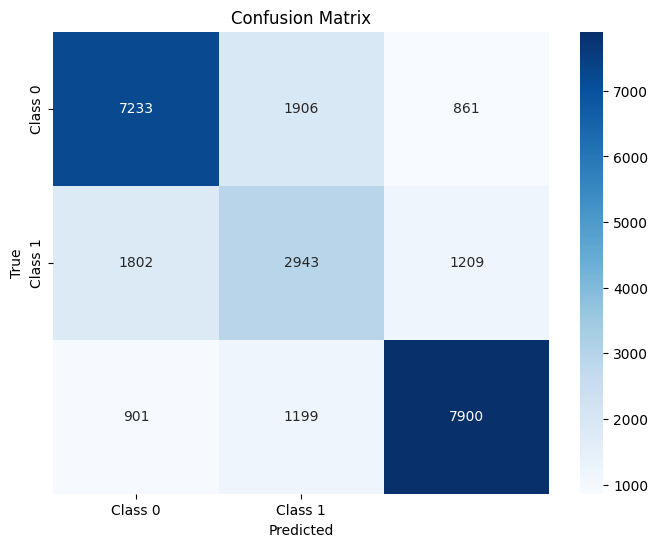

In [89]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<a id="6"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">6. Deployment</h2>

In [90]:
import pickle

pickle.dump(cv,open('../models/bow.pkl','wb'))
pickle.dump(model,open('../models/model.pkl','wb'))